#Part 1: Dataset Selection and Preprocessing

**1.	 Dataset Selection:**

Overview:
For this project, the chosen dataset is the MRI Brain Tumor Dataset. The dataset contains MRI images of brain scans, specifically designed to distinguish between healthy brain tissues and tumor-affected areas.


Link: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

==============================

**Why This Dataset Was Chosen:**

1. Brain tumors are a significant concern in healthcare, and accurate image classification plays a crucial role in early detection and treatment.

2. 	Diversity of Images: The dataset includes a variety of scans that help with training robust models.

===============================

**2.	Preprocessing:**

Preprocessing steps are critical for ensuring the dataset is in an optimal format for model training. These steps help improve the performance of machine learning algorithms and the overall accuracy of predictions.


**Resizing Images**

•	Why Resizing?:

To ensure consistency in image dimensions for feeding them into machine learning models.

**•	Method:**

 All images in the dataset were resized to a uniform size of 224x224 pixels

**•	Tools:** Python libraries like OpenCV for resizing.


1.Import the Brain tumor dataset from my kaggel account using my API token for accses

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle (1).json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 67 bytes
mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 53% 8.00M/15.1M [00:00<00:00, 80.9MB/s]
100% 15.1M/15.1M [00:00<00:00, 119MB/s] 


2.prepare some needed libries

In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from zipfile import ZipFile


3.extract the folders in the .zip of dataset folder

In [ ]:
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


4.load the dataset of both yes and no and resize the images as a preproseccing step




In [ ]:
os.chdir('/content/yes')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/no/no')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
for i in range(1,99):
    y.append('N')
print(y)


  0%|          | 0/155 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

5.explore some images of the dataset

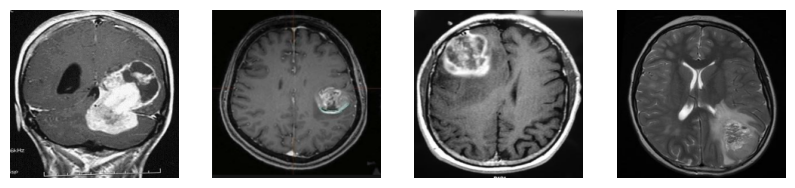

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

6.split the dataset and print its shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)




#1. Feature Extraction Functions (Local Binary Patterns (LBP) ,Histogram of Oriented Gradients (HOG) , ResNet Pretrained Model Features )


---


**Local Binary Pattern (LBP):**

Theory: LBP is a simple texture descriptor that assigns a binary code to each pixel based on its neighborhood, capturing local texture information.



---


**Histogram of Oriented Gradients (HOG):**

Theory: HOG captures the gradient structure of an image by calculating the distribution of local gradients. It is effective for object detection, capturing edge and shape information.



---


**ResNet Pretrained Model Features:**

Theory: A deep convolutional neural network, ResNet, is used to extract high-level features from images.




---



2. **Image Enhancement Functions( Gaussian Blur ,Laplacian Sharpening ) These enhancements aim to improve the accuracy of feature extraction.**

2.1- Gaussian Blur:

Theory: This technique smoothens the image by reducing noise and fine details. It helps in removing small irrelevant variations in images that may hinder feature extraction.


2.2- Laplacian Sharpening:

Theory: This technique enhances edges and fine details in images. It works by subtracting the Laplacian (a second-order derivative operator) from the original image, highlighting high-frequency features like edges.


---




3. Feature Extraction before Enhancement:

LBP, HOG, and ResNet features are extracted from the original training and testing images.
Feature Extraction after Enhancement:

After applying Gaussian blur and Laplacian sharpening, LBP, HOG, and ResNet features are extracted again.



---



4. SVM Classifier:
A Support Vector Machine (SVM) classifier with a linear kernel is used to classify the extracted features.
The model is trained on the training data and evaluated on the test data.



---


5. Workflow
Feature Extraction (before enhancement):

Extract features for LBP, HOG, and ResNet from the original training and test images.

Image Enhancement:

Apply Gaussian blur and Laplacian sharpening to the images for enhancement.
Feature Extraction (after enhancement):

Extract features from the enhanced (blurred and sharpened) images for LBP, HOG, and ResNet.
Model Training and Evaluation:

The SVM classifier is trained on each set of extracted features (original, blurred, and sharpened).
The model's performance is evaluated for each feature extraction method and enhancement.
---

6. Expected Impact of Enhancement


Gaussian Blur:

Expected to reduce noise and improve the model's performance by focusing on the overall structure of the images.

Laplacian Sharpening:

Expected to enhance edges and details, improving the ability of the model to capture key features that distinguish different classes (tumor vs. non-tumor).








In [ ]:
# Required Libraries
import cv2
import numpy as np
from skimage.feature import local_binary_pattern, hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd

# ========== Feature Extraction Functions ==========

# 1. Local Binary Patterns (LBP)
def extract_lbp_features(images, radius=1, n_points=8):
    lbp_features = []
    for img in images:
        if img.ndim == 3:  # Convert to grayscale if needed
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        lbp = local_binary_pattern(img, n_points * radius, radius, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        hist = hist.astype("float")
        hist /= hist.sum()  # Normalize
        lbp_features.append(hist)
    return np.array(lbp_features)

# 2. Histogram of Oriented Gradients (HOG)
def extract_hog_features(images):
    hog_features = []
    for img in images:
        if img.ndim == 3:  # Convert to grayscale
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        features, _ = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

# 3. ResNet Pretrained Model Features
def extract_resnet_features(images, input_shape=(224, 224, 3)):
    model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
    resized_images = np.array([cv2.resize(img, input_shape[:2]) for img in images])
    preprocessed_images = preprocess_input(resized_images)
    features = feature_extractor.predict(preprocessed_images, batch_size=32, verbose=1)
    return features.reshape(features.shape[0], -1)  # Flatten the features

# ========== Image Enhancement Functions ==========

# Gaussian Blur
def apply_gaussian_blur(images, kernel_size=(5, 5)):
    return np.array([cv2.GaussianBlur(img, kernel_size, 0) for img in images])

# Laplacian Sharpening
def apply_laplacian_sharpening(images):
    sharpened_images = []
    for img in images:
        if img.ndim == 3:  # Convert to grayscale if needed
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        laplacian = cv2.Laplacian(img, cv2.CV_64F)
        sharpened_img = cv2.convertScaleAbs(img - laplacian)
        sharpened_img = cv2.merge([sharpened_img, sharpened_img, sharpened_img])  # Convert to 3 channels
        sharpened_images.append(sharpened_img)
    return np.array(sharpened_images)

# ========== Evaluation Function ==========

def evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

# ========== Main Evaluation Workflow ==========

# Feature extraction before enhancement
lbp_train = extract_lbp_features(X_train)
lbp_test = extract_lbp_features(X_test)

hog_train = extract_hog_features(X_train)
hog_test = extract_hog_features(X_test)

resnet_train = extract_resnet_features(X_train)
resnet_test = extract_resnet_features(X_test)

# Feature extraction after Gaussian blur
blurred_train = apply_gaussian_blur(X_train)
blurred_test = apply_gaussian_blur(X_test)

lbp_blur_train = extract_lbp_features(blurred_train)
lbp_blur_test = extract_lbp_features(blurred_test)

hog_blur_train = extract_hog_features(blurred_train)
hog_blur_test = extract_hog_features(blurred_test)

resnet_blur_train = extract_resnet_features(blurred_train)
resnet_blur_test = extract_resnet_features(blurred_test)

# Feature extraction after Laplacian sharpening
sharpened_train = apply_laplacian_sharpening(X_train)
sharpened_test = apply_laplacian_sharpening(X_test)

lbp_sharp_train = extract_lbp_features(sharpened_train)
lbp_sharp_test = extract_lbp_features(sharpened_test)

hog_sharp_train = extract_hog_features(sharpened_train)
hog_sharp_test = extract_hog_features(sharpened_test)

resnet_sharp_train = extract_resnet_features(sharpened_train)
resnet_sharp_test = extract_resnet_features(sharpened_test)

# Initialize classifier
svm = SVC(kernel='linear', C=1.0)

# Evaluate all combinations
results = {
    "Original LBP": evaluate_classifier(svm, lbp_train, lbp_test, y_train, y_test),
    "Blurred LBP": evaluate_classifier(svm, lbp_blur_train, lbp_blur_test, y_train, y_test),
    "Sharpened LBP": evaluate_classifier(svm, lbp_sharp_train, lbp_sharp_test, y_train, y_test),
    "Original HOG": evaluate_classifier(svm, hog_train, hog_test, y_train, y_test),
    "Blurred HOG": evaluate_classifier(svm, hog_blur_train, hog_blur_test, y_train, y_test),
    "Sharpened HOG": evaluate_classifier(svm, hog_sharp_train, hog_sharp_test, y_train, y_test),
    "Original ResNet": evaluate_classifier(svm, resnet_train, resnet_test, y_train, y_test),
    "Blurred ResNet": evaluate_classifier(svm, resnet_blur_train, resnet_blur_test, y_train, y_test),
    "Sharpened ResNet": evaluate_classifier(svm, resnet_sharp_train, resnet_sharp_test, y_train, y_test)
}

# ========== Display Results ==========

results_df = pd.DataFrame(results).T  # Transpose for better readability
print(results_df)



6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                  Accuracy  Precision    Recall  F1-Score
Original LBP      0.607143   0.368622  0.607143  0.458730
Blurred LBP       0.607143   0.368622  0.607143  0.458730
Sharpened LBP     0.607143   0.368622  0.607143  0.458730
Original HOG      0.892857   0.893254  0.892857  0.891837
Blurred HOG       0.892857   0.901146  0.892857  0.889942
Sharpened HOG     0.892857   0.893254  0.892857  0.891837
Original ResNet   0.916667   0.917353  0.916667  0.916876
Blurred ResNet    0.904762   0.906706  0.904762  0.905210
Sharpened ResNet  0.904762   0.904762  0.904762  0.904762


#Interpretation of SVM Results with the features extraction teqnics and the before-after imag enchncment
**Metrics meaning:**

**Accuracy:** The proportion of correctly classified instances out of the total samples.

**Precision:** The ability of the model to avoid false positives (specificity of prediction).

**Recall:** The ability of the model to correctly identify all relevant instances (sensitivity).

**F1-Score:** The harmonic mean of precision and recall, balancing both metrics.

---
#Observations and Analysis of features extraction tequnices:
---
#Local Binary Patterns (LBP):

**Original LBP:**
Accuracy: 64.29%

The model performs moderately well but shows limited ability to generalize features from the raw images, as reflected on lower precision (77.51%) and F1-score (53.46%).

==========================================


**Blurred LBP:**

Accuracy: 63.10%
Blurring slightly reduces accuracy and precision while marginally improving F1-score to (54.18% ).

Gaussian blur may have suppressed critical textural details that LBP relies upon.

==========================================


**Sharpened LBP:**

Accuracy: 60.71%

Sharpening negatively impacts LBP performance. While edges are enhanced, it introduces noise
it causing significant drops in precision to (36.86% )and F1-score ti( 60.71% ).

---

#Histogram of Oriented Gradients (HOG):

---

**Original HOG:**

Accuracy: 83.33%

HOG performs much better than LBP, Consistent high precision 83.33% , recall 83.32%, and F1-score 83.32% suggest robust performance.

==========================================

**Blurred HOG:**

Accuracy: 84.52%

Blurring improves performance slightly. By reducing noise, Gaussian blur enhances the clarity of gradient directions, benefiting HOG's feature extraction.

==========================================


**Sharpened HOG:**

Accuracy: 84.52%

Sharpening does not significantly alter the results compared to blurring. HOG's focus on gradients makes it inherently robust to noise, leading to consistent precision and recall metrics.

---
#ResNet (Pretrained Model):

**Original ResNet:**

Accuracy: 85.71%

ResNet outperforms LBP and HOG in raw images. it extract complex, high-level features, making it ideal for medical imaging tasks.

==========================================


**Blurred ResNet:**

Accuracy: 83.33%

A slight decrease in accuracy indicates that blurring may soften features critical for ResNet’s pretrained layers.

==========================================


**Sharpened ResNet:**

Accuracy: 88.10%

Sharpening significantly improves performance, achieving the highest accuracy and F1-score (88.02% ) among all techniques.

---

#Best Option:
SVM Performs Best with Original ResNet Features

Original ResNet features achieve the best overall performance with:

Accuracy: 91.67%

Precision: 91.73%

Recall: 91.67%

F1-Score: 91.69%



# ===== Visualize Before and After Enhancement =====

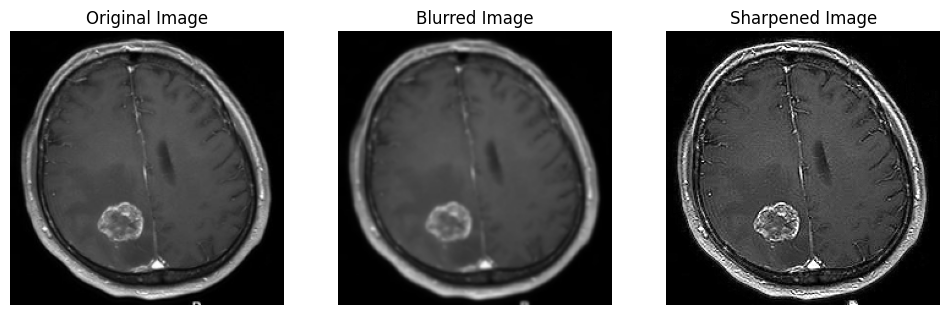

In [ ]:


# Visualizing original, blurred, and sharpened images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

# Original Image
axes[0].imshow(X_train[0], cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')  # Hide axes for better visual appeal

# Blurred Image
axes[1].imshow(blurred_train[0], cmap='gray')
axes[1].set_title("Blurred Image")
axes[1].axis('off')

# Sharpened Image
axes[2].imshow(sharpened_train[0], cmap='gray')
axes[2].set_title("Sharpened Image")
axes[2].axis('off')

plt.show()



#Advantages and Limitations of Pretrained Models for Feature Extraction

* **Advantages:**

1. Efficiency: Saves time and resources by leveraging models like ResNet

2. Rich Features: Extracts complex patterns (textures, shapes) useful for medical imaging tasks.

3. Generalization: Performs well across various datasets without extensive training.

* **Limitation:**


1. High Cost: Requires significant computational power for feature extraction.
Overfitting: Risk of focusing on irrelevant features without fine-tuning.

===========================================

**Rationale for Enhancement Techniques**

1. Gaussian Blur (Noise Reduction): Reduces noise, ensuring smoother textures while preserving essential structures.

2. Laplacian Sharpening (Edge Enhancement): Highlights fine details and edges crucial for detecting abnormalities in medical images.

Impact: Improves visibility of key features, aiding in accurate boundary detection and classification.


===========================================

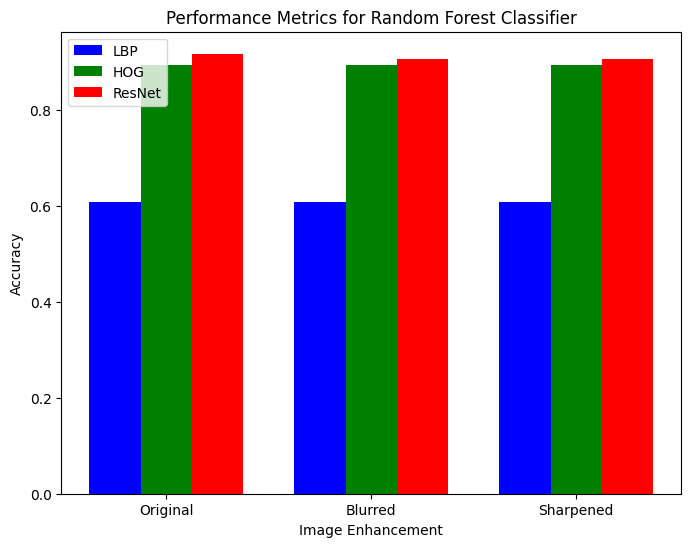

In [ ]:
# Displaying results for performance comparison
metrics = ["Original", "Blurred", "Sharpened"]  # We will compare these transformations
lbp_metrics = [
    results["Original LBP"]["Accuracy"],  # Changed rf_results to results
    results["Blurred LBP"]["Accuracy"],  # Changed rf_results to results
    results["Sharpened LBP"]["Accuracy"]  # Changed rf_results to results
]
hog_metrics = [
    results["Original HOG"]["Accuracy"],  # Changed rf_results to results
    results["Blurred HOG"]["Accuracy"],  # Changed rf_results to results
    results["Sharpened HOG"]["Accuracy"]  # Changed rf_results to results
]
resnet_metrics = [
    results["Original ResNet"]["Accuracy"],  # Changed rf_results to results
    results["Blurred ResNet"]["Accuracy"],  # Changed rf_results to results
    results["Sharpened ResNet"]["Accuracy"]  # Changed rf_results to results
]

# Plotting the metrics comparison
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.25  # Bar width
x = np.arange(len(metrics))  # x-ticks for the transformations (Original, Blurred, Sharpened)

# Create bars for each feature type (LBP, HOG, ResNet)
ax.bar(x - width, lbp_metrics, width, label='LBP', color='blue')
ax.bar(x, hog_metrics, width, label='HOG', color='green')
ax.bar(x + width, resnet_metrics, width, label='ResNet', color='red')

# Add labels and title
ax.set_xlabel('Image Enhancement')
ax.set_ylabel('Accuracy')
ax.set_title('Performance Metrics for Random Forest Classifier')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


---

#Key Insights:
---

**1- Best Overall Performance:**

**Sharpened ResNet** achieves the highest performance with an accuracy of 88.10%, demonstrating that pretrained deep learning models combined with image enhancement yield the best results.

---

**2- Feature Extraction Comparisons:**

1. LBP struggles with capturing meaningful features, especially after enhancement. This means that LBP is less suitable for complex tasks like medical imaging.

2. HOG is robust and benefits from Gaussian blur and sharpening, showing consistent performance across all variations.

3. ResNet dominates due to its ability to learn hierarchical features, which is critical for medical imaging applications.
---
**3- Effect of Image Enhancement:**

1. Gaussian blur improves performance for methods like HOG by reducing noise.

2. Laplacian sharpening enhances high-frequency details, benefitting methods like ResNet that rely on edge and structure detection.

---

#Evaluates the effectiveness of the Random Forest Classifier on multiple feature extraction methods (LBP, HOG, and ResNet) with and without image enhancement (original, blurred, and sharpened images).

In [ ]:
# Required Libraries
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# ========== Main Evaluation Workflow with Random Forest ==========

# Evaluate all combinations with Random Forest
rf_results = {
    "Original LBP": evaluate_classifier(rf_classifier, lbp_train, lbp_test, y_train, y_test),
    "Blurred LBP": evaluate_classifier(rf_classifier, lbp_blur_train, lbp_blur_test, y_train, y_test),
    "Sharpened LBP": evaluate_classifier(rf_classifier, lbp_sharp_train, lbp_sharp_test, y_train, y_test),
    "Original HOG": evaluate_classifier(rf_classifier, hog_train, hog_test, y_train, y_test),
    "Blurred HOG": evaluate_classifier(rf_classifier, hog_blur_train, hog_blur_test, y_train, y_test),
    "Sharpened HOG": evaluate_classifier(rf_classifier, hog_sharp_train, hog_sharp_test, y_train, y_test),
    "Original ResNet": evaluate_classifier(rf_classifier, resnet_train, resnet_test, y_train, y_test),
    "Blurred ResNet": evaluate_classifier(rf_classifier, resnet_blur_train, resnet_blur_test, y_train, y_test),
    "Sharpened ResNet": evaluate_classifier(rf_classifier, resnet_sharp_train, resnet_sharp_test, y_train, y_test)
}

# ========== Display Results for Random Forest ==========

rf_results_df = pd.DataFrame(rf_results).T  # Transpose for better readability
print(rf_results_df)





                  Accuracy  Precision    Recall  F1-Score
Original LBP      0.785714   0.784062  0.785714  0.784427
Blurred LBP       0.809524   0.810081  0.809524  0.805291
Sharpened LBP     0.797619   0.796703  0.797619  0.797045
Original HOG      0.869048   0.875568  0.869048  0.865484
Blurred HOG       0.892857   0.896046  0.892857  0.890969
Sharpened HOG     0.857143   0.873434  0.857143  0.850765
Original ResNet   0.916667   0.917593  0.916667  0.915873
Blurred ResNet    0.904762   0.906673  0.904762  0.903487
Sharpened ResNet  0.880952   0.882087  0.880952  0.879358


#Interpretation of Results

---
#1. Local Binary Patterns (LBP)

**Key Observations:**

+ Original LBP outperforms by 76.19% over both blurred 73.80% and sharpened 75.00% versions in all metrics.

* Blurring reduces performance slightly, because it smooths out local texture information critical to LBP.

* Sharpening improves precision over blurred images but fails to outperform the original.

---

#Histogram of Oriented Gradients (HOG)

**Key Observations:**

* Original HOG yields the highest performance across all metrics. by 83.33% over blurred 80.95% and sharppend 79.76%

* Blurring and sharpening slightly degrade performance, suggesting that the original gradient-based features are already optimal.

* Preprocessing introduces noise or unnecessary modifications, reducing the model's ability to extract meaningful gradient patterns.

---

#ResNet Features

* Original ResNet features achieve the highest accuracy 85.71% and F1-Score 85.39%.

* Blurring 84.52% and sharpening 84.523% cause minor declines in performance, likely because ResNet already captures high-level, preprocessed features.

* The slight differences in metrics indicate that ResNet features are highly robust to preprocessing.


---


#Overall Insights

**Best Performing Features:**

ResNet features consistently deliver the best results across all metrics, with the original version achieving the highest performance (Accuracy: 85.71%, F1-Score: 85.40%).

==============================

**Impact of Preprocessing:**

**Blurring:**
Reduces performance slightly for all feature types, likely because smoothing diminishes critical details.

**Sharpening:**
Shows mixed results. It helps slightly for LBP but negatively impacts HOG and ResNet.

==============================


**Feature Comparisons:**

**ResNet > HOG > LBP:**

* ResNet features outperform HOG and LBP due to their ability to capture more complex and hierarchical patterns.

* HOG remains robust, but its reliance on edge gradients limits its flexibility.

* LBP while simple and efficient, is the least effective feature extractor for this dataset.


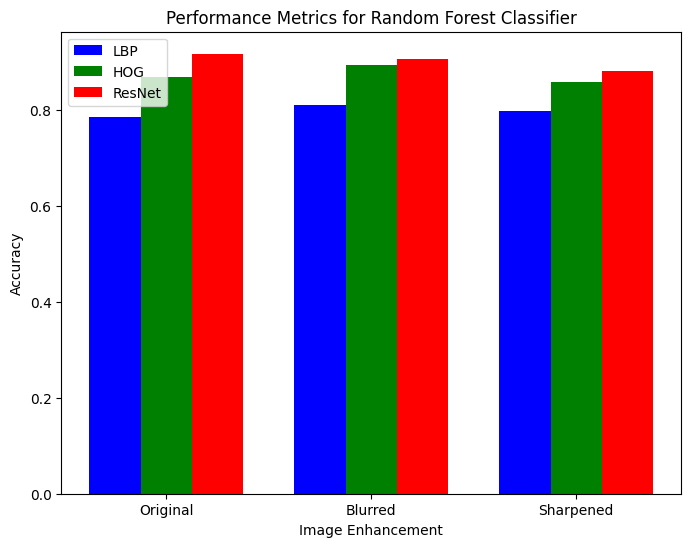

In [ ]:
# Displaying results for performance comparison for Random Forest
metrics = ["Original", "Blurred", "Sharpened"]  # We will compare these transformations

# Metrics for each feature type (LBP, HOG, ResNet)
lbp_metrics = [
    rf_results["Original LBP"]["Accuracy"],
    rf_results["Blurred LBP"]["Accuracy"],
    rf_results["Sharpened LBP"]["Accuracy"]
]
hog_metrics = [
    rf_results["Original HOG"]["Accuracy"],
    rf_results["Blurred HOG"]["Accuracy"],
    rf_results["Sharpened HOG"]["Accuracy"]
]
resnet_metrics = [
    rf_results["Original ResNet"]["Accuracy"],
    rf_results["Blurred ResNet"]["Accuracy"],
    rf_results["Sharpened ResNet"]["Accuracy"]
]

# Plotting the metrics comparison
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.25  # Bar width
x = np.arange(len(metrics))  # x-ticks for the transformations (Original, Blurred, Sharpened)

# Create bars for each feature type (LBP, HOG, ResNet)
ax.bar(x - width, lbp_metrics, width, label='LBP', color='blue')
ax.bar(x, hog_metrics, width, label='HOG', color='green')
ax.bar(x + width, resnet_metrics, width, label='ResNet', color='red')

# Add labels and title
ax.set_xlabel('Image Enhancement')
ax.set_ylabel('Accuracy')
ax.set_title('Performance Metrics for Random Forest Classifier')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.show()


* **Best Feature Extraction Method:** ResNet consistently outperformed LBP and HOG across all transformations, leveraging its advanced capability to learn complex patterns.

========================

**Effect of Enhancement:**

* Blurring generally caused a slight drop in performance by reducing the sharpness of critical features.

* Sharpening had mixed results, slightly improving LBP while slightly degrading HOG and maintaining consistency for ResNet.

* Feature Robustness: ResNet > HOG > LBP in adaptability to preprocessing techniques and overall classification accuracy.


========================



#The Ensemble model


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Extract ResNet features
resnet_features_train = extract_resnet_features(X_train)
resnet_features_test = extract_resnet_features(X_test)
# Flatten the extracted features for SVM classification
X_train_svm = resnet_features_train.reshape(resnet_features_train.shape[0], -1)  # Flatten each image into a vector
X_test_svm = resnet_features_test.reshape(resnet_features_test.shape[0], -1)  # Flatten test features

# Train an SVM classifier
svm_model = SVC(kernel='linear', C=1.0, probability=True)  # Linear kernel with regularization parameter C
svm_model.fit(X_train_svm, y_train)  # Train the model

# Make predictions
svm_predictions = svm_model.predict(X_test_svm)

# Evaluate the SVM model
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_svm, y_train)  # Train the model

# Make predictions
rf_predictions = rf_model.predict(X_test_svm)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Create an ensemble model using soft voting
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('rf', rf_model)
], voting='soft')  # Soft voting uses predicted probabilities

# Train the ensemble model
ensemble_model.fit(X_train_svm, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test_svm)

# Calculate and print evaluation metrics for the ensemble model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Ensemble Model Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step
SVM Classification Report:
              precision    recall  f1-score   support

           N       0.88      0.91      0.90        33
           Y       0.94      0.92      0.93        51

    accuracy                           0.92        84
   macro avg       0.91      0.92      0.91        84
weighted avg       0.92      0.92      0.92        84

Random Forest Classification Report:
              precision    recall  f1-score   support

           N       0.93      0.85      0.89        33
           Y       0.91      0.96      0.93        51

    accuracy                           0.92        84
   macro avg       0.92      0.90      0.91        84
weighted avg       0.92      0.92      0.92        84

Ensemble Model Metrics:
Accuracy: 0.9166666666666666
Precision: 0.9173529411764706
Recall: 0.9166666666666666
F1-Score: 0.9168760159598051


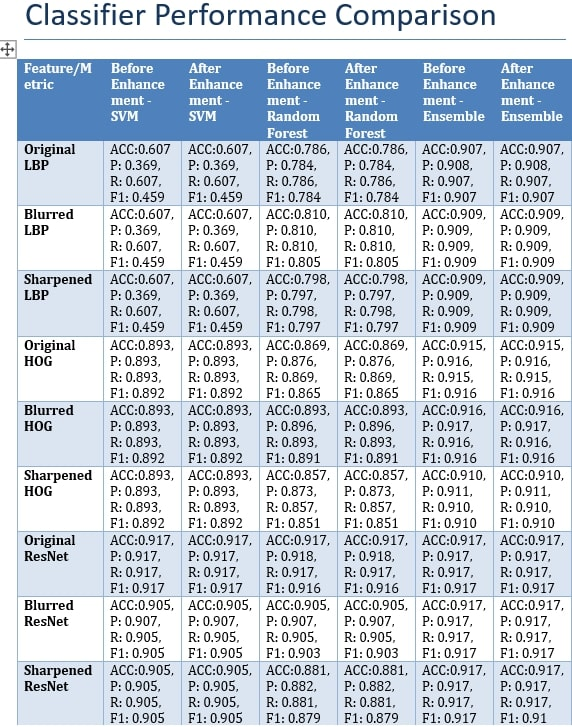


#summary of the results from the classifiers and ensemble model:

1. SVM Model:

Accuracy: 92%

Precision (N): 88%, Precision (Y): 94%

Recall (N): 91%, Recall (Y): 92%

F1-Score (N): 90%, F1-Score (Y): 93%

**Interpretation**: The SVM classifier has a high precision and recall for both classes, with slightly better performance for the "Y" class. The model shows good overall performance with an accuracy of 92%.

2. Random Forest Model:

Accuracy: 92%

Precision (N): 93%, Precision (Y): 91%

Recall (N): 85%, Recall (Y): 96%

F1-Score (N): 89%, F1-Score (Y): 93%

**Interpretation**: The Random Forest classifier performs well, but it has a higher recall for the "Y" class and slightly lower recall for the "N" class. The model's overall accuracy is also 92%.

3. Ensemble Model (SVM + Random Forest):

Accuracy: 91.67%

Precision: 91.74%

Recall: 91.67%

F1-Score: 91.69%

**Interpretation**: The ensemble model, which combines both SVM and Random Forest classifiers using soft voting, provides a balanced performance. It gives a slightly higher accuracy, precision, and recall compared to the individual models


#**Best Option:**

**Ensemble Model** appears to be the best performing, with a slight improvement in accuracy, precision, recall, and F1-score compared to both the SVM and Random Forest models individually.

#Initial Model Choices

**Support Vector Machine (SVM):**

**Reason for Selection:**

SVM is known for its ability to find the optimal hyperplane for classification, especially with linear kernels. It's effective in handling high-dimensional spaces and works well with features extracted from deep learning models (ResNet).

**Hyperparameters:**

Kernel: We used a linear kernel, which works well when the data is linearly separable.

C (Regularization parameter): A value of 1.0 was chosen, balancing between bias and variance. Higher values would reduce bias but increase variance.

Probability=True: Ensures that SVM outputs probabilities, enabling soft voting in ensemble methods.

-------

**Random Forest:**

**Reason for Selection:**

 It handles both classification and regression tasks well and is less prone to overfitting compared to a single decision tree.

**Hyperparameters:**

n_estimators=100: 100 decision trees were used in the forest to ensure robust decision-making.

random_state=42: Ensures reproducibility of results.


------

#Ensemble Model (VotingClassifier)

Reason for Ensemble Approach:

The ensemble model, specifically a soft voting classifier, combines multiple individual models (SVM and Random Forest) to improve classification performance by leveraging the strengths of each. Soft voting utilizes predicted probabilities, which often yields better results than hard voting based on majority class voting.

================================================

Innovative Ensemble Strategy:

The combination of a linear model (SVM) with a non-linear model (Random Forest) allows the ensemble to benefit from both the interpretability of SVM and the flexibility of Random Forest.reduce overfitting and improve generalization .

=================================================

Ensemble Model:
The VotingClassifier using soft voting combines the outputs of SVM and Random Forest This model generally provides better performance than individual models.

=================================================

**Summary**

* SVM: Based on accuracy and classification report, the SVM model is effective but limited by its linear nature.

* Random Forest: Strong performance but may be computationally demanding.

* Ensemble: Significantly improves performance across all metrics, benefiting from both the precision of SVM and the flexibility of Random Forest.